In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

C:\Users\pc\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
sal=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# EDA

In [3]:
 sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
sal.nunique().to_frame("Unique Values")

,Unique Values
rank,3
discipline,2
yrs.since.phd,53
yrs.service,52
sex,2
salary,371


In [28]:
object_datatype=[]
for x in sal.dtypes.index:
     if sal.dtypes[x]=='O':
        object_datatype.append(x)
int_datatype=[]
for x in sal.dtypes.index:
    if sal.dtypes[x]=='int64':
        int_datatype.append(x)

In [10]:
le=LabelEncoder()

In [13]:
sal['rank']=le.fit_transform(sal['rank'])
sal['discipline']=le.fit_transform(sal['discipline'])
sal['sex']=le.fit_transform(sal['sex'])

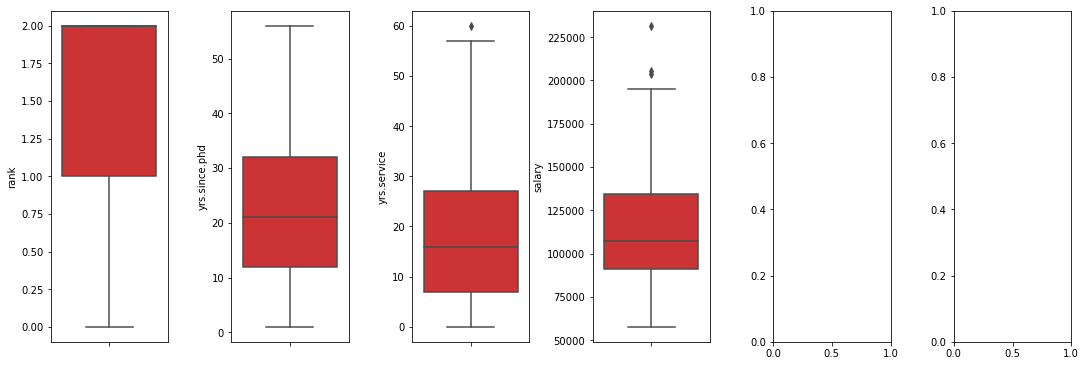

In [29]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in sal[int_datatype].items():
    sns.boxplot(y=col, data=sal, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

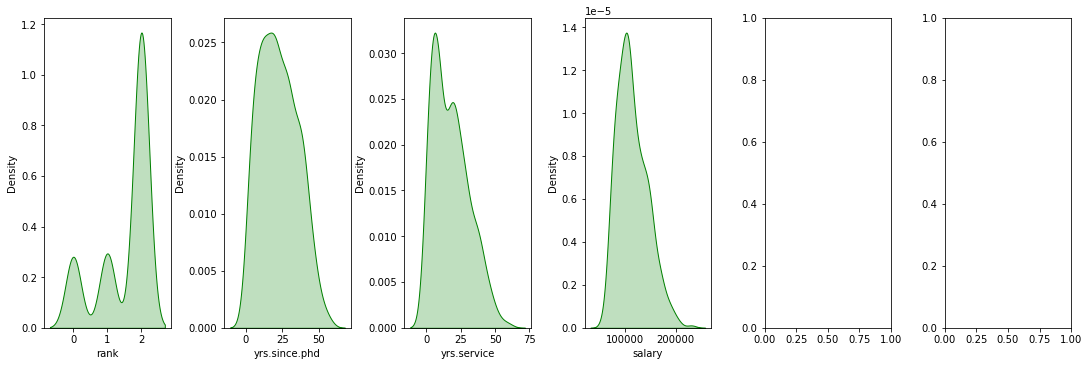

In [31]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in sal[int_datatype].items():
    sns.distplot(value,ax=ax[index], hist=False, color="g", kde_kws={'shade':True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


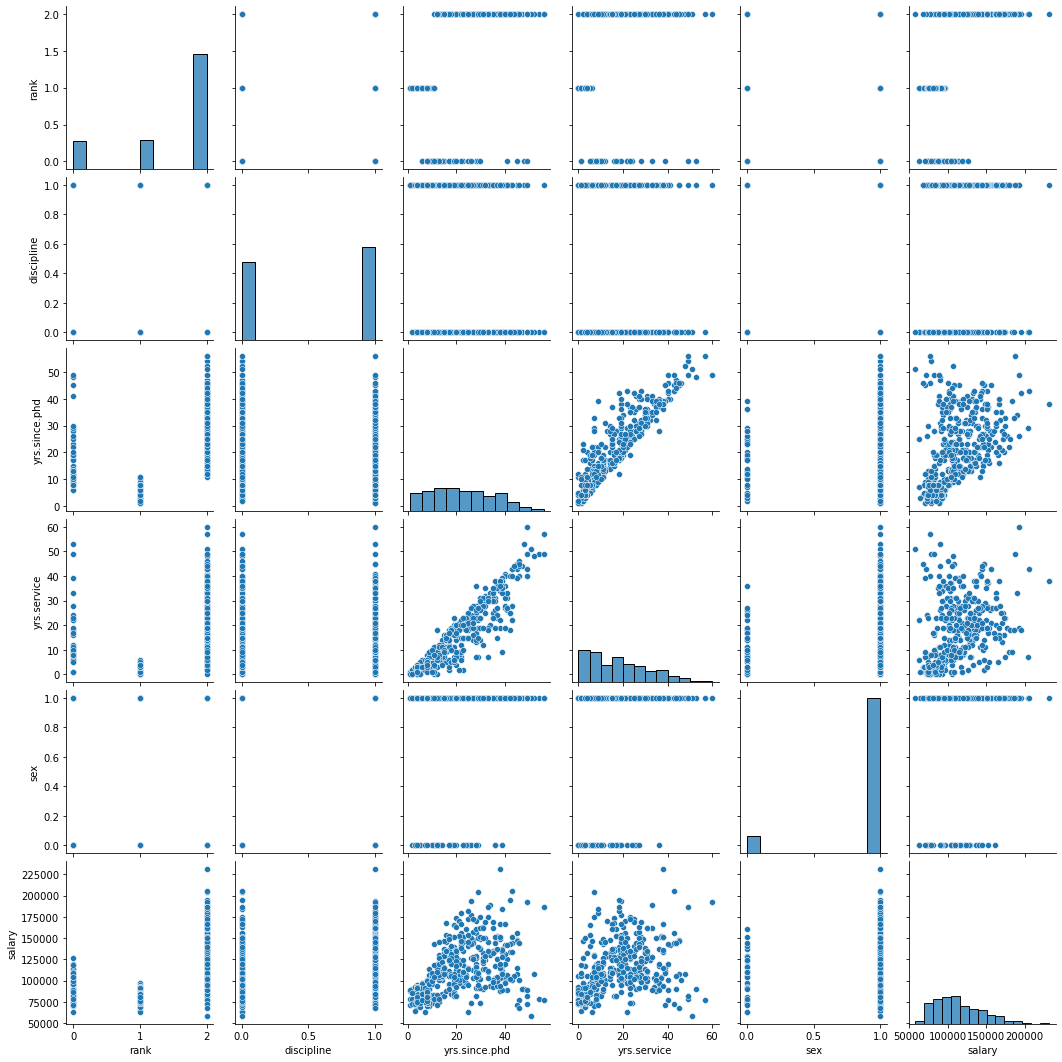

In [32]:
sns.pairplot(sal)

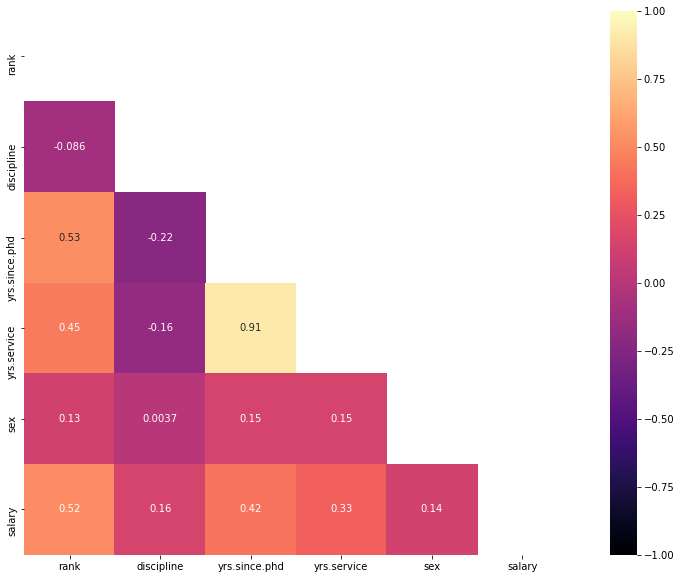

In [33]:
plt.style.use('seaborn-pastel')
upper_triangle=np.triu(sal.corr())
figure=plt.figure(figsize=(15,10))
sns.heatmap(sal.corr(),vmin=-1,vmax=1,annot=True, square=True, cmap='magma', annot_kws={'size':10},mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

since yrs.service is highly correleated to that years since phd so, we just need to drop one of them.

In [35]:
sal.drop('yrs.service', axis=1,inplace=True
        )

In [36]:
sal

,rank,discipline,yrs.since.phd,sex,salary
0,2,1,19,1,139750
1,2,1,20,1,173200
2,1,1,4,1,79750
3,2,1,45,1,115000
4,2,1,40,1,141500
...,...,...,...,...,...
392,2,0,33,1,103106
393,2,0,31,1,150564
394,2,0,42,1,101738
395,2,0,25,1,95329


# Remove Outliers

In [38]:
z=np.abs(zscore(sal))
threashold=3
sal1=sal[(z<3).all(axis=1)]
sal1.shape

(356, 5)

In [39]:
loss=(sal.shape[0]-sal1.shape[0])/sal.shape[0]*100
loss

10.327455919395465

# Skewness

In [40]:
sal1.skew()

rank            -1.250361
discipline      -0.181271
yrs.since.phd    0.256629
sex              0.000000
salary           0.600073
dtype: float64

# Splitting the whole dataset into two parts namely X and Y

In [50]:
x=sal1.drop('salary',axis=1)
y=sal1['salary']

In [51]:
x.shape,y.shape

((356, 4), (356,))

# Feature Scaling

In [53]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,rank,discipline,yrs.since.phd,sex
0,0.620145,0.913812,-0.296330,0.0
1,0.620145,0.913812,-0.219328,0.0
2,-0.726024,0.913812,-1.451369,0.0
3,0.620145,0.913812,1.705737,0.0
4,0.620145,0.913812,1.320724,0.0
...,...,...,...,...
351,0.620145,-1.094318,0.781706,0.0
352,0.620145,-1.094318,0.627701,0.0
353,0.620145,-1.094318,1.474729,0.0
354,0.620145,-1.094318,0.165685,0.0


# finding best Random state for building best Classification model

In [59]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)   

Best R2 score is 0.9922171983979132 on Random State 818


# Machine Learning Model for Regression with evaulution matrix

In [60]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=503)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model,X,Y,cv=5).mean())*100
    print('cv score is ', cv)
    
    # Result of r2 score minus cv score
    result = r2 - cv
    print("R2 Score - Cross Validation Score is", result)

In [62]:
#linerarRegression
model=LinearRegression()
reg(model,x,y)

RMSE Score is: 0.04193784176797848
R2 Score is: 98.77599201044157
cv score is  98.74329182411314
R2 Score - Cross Validation Score is 0.03270018632842664


In [64]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 0.042149065679370365
R2 Score is: 98.76363129638561
cv score is  98.74391900517003
R2 Score - Cross Validation Score is 0.019712291215583377


In [65]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, x, y)

RMSE Score is: 0.1612348324668891
R2 Score is: 81.90786413554076
cv score is  79.32275025374085
R2 Score - Cross Validation Score is 2.585113881799913


In [66]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x,y )

RMSE Score is: 0.18464575415359077
R2 Score is: 76.27256728711555
cv score is  76.2469213759074
R2 Score - Cross Validation Score is 0.025645911208144412


In [68]:
#decison tree
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x, y)

RMSE Score is: 0.21604769527836132
R2 Score is: 67.51585991849338
cv score is  61.552447031549896
R2 Score - Cross Validation Score is 5.96341288694348
